# import

In [10]:
import sys
print('python', sys.version)

import numpy as np
print('numpy', np.__version__)

import pandas as pd
print('pandas', pd.__version__)

import matplotlib as mpl
print('matplotlib', mpl.__version__)

import matplotlib.pyplot as plt

# # 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## 한글 주석을 위해 추가
from matplotlib import font_manager, rc
# font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family='AppleGothic')

## minus sign tick 오류 방지를 위해 추가
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False

python 3.10.13 (main, Mar 12 2024, 15:59:23) [Clang 15.0.0 (clang-1500.1.0.2.5)]
numpy 1.24.0
pandas 2.2.3
matplotlib 3.8.3


,1st,2nd,3rd,4th
A,4,3,2,1
B,1,2,3,4


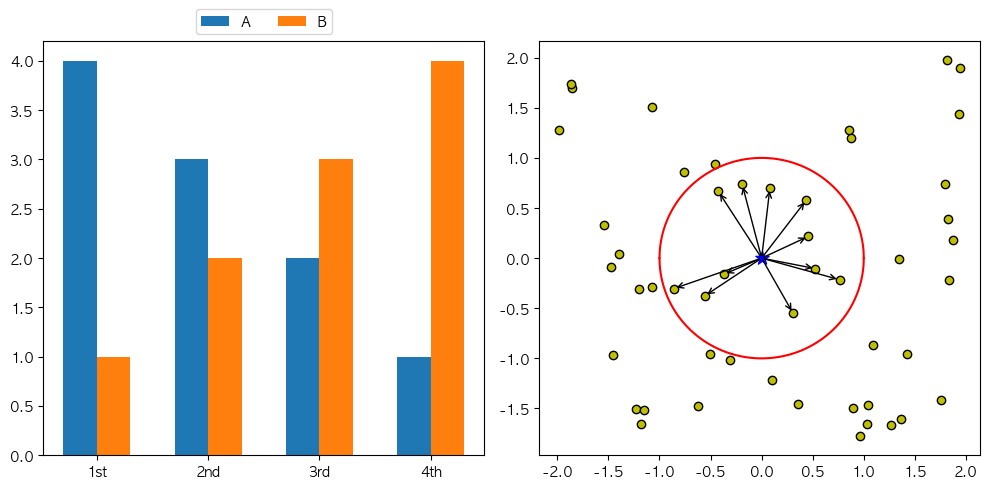

In [24]:
fig=plt.figure(figsize=(10,5), dpi=100)
ax1, ax2 =fig.subplots(1,2)

##########################
############ ax1 #########
##########################

# 주어진 df를 가지고 행 별로 다중그래프를 그리시오 (bar width: 0.3)
# 결과 그림과 같이 xtick에 df의 columns를 추가하시오
# 결과 그림과 같이 legend를 추가하시오

df = pd.DataFrame(np.array([4,3,2,1,1,2,3,4]).reshape(2,4), columns=['1st','2nd','3rd','4th'], index=['A','B'])
df

X=np.arange(4)
w1=0.3

#=== 코드작성 ===#
_=ax1.bar(X,df.loc['A'],width=w1, label='A')
_=ax1.bar(X+w1,df.loc['B'],width=w1, label='B')
_=ax1.legend(ncol=2,loc='lower center',bbox_to_anchor=(0.5,1))
_=ax1.set_xticks(X+w1/2, df.columns)

##########################
############ ax2 #########
##########################

# 랜덤하게 100개의 점을 노란색으로 scatter하고,(0,0)에 파란 별로 scatter 하였다.
# 그리고 (X^2+Y^2=1)를 만족하는 원을 빨간색으로 표시하였다.
# 파란별(0,0)으로부터 빨간 원안에 있는 각 노란 점 들을 가르키도록 화살표를 나타내시오

df=pd.DataFrame(np.random.uniform(-2,2,size=(50,2)),
                columns=['x','y'])
_=ax2.scatter(df['x'],df['y'], color='y', edgecolor='k')

# (0,0) 파란점 scatter
_=ax2.scatter(0,0,color='b',s=100, marker='*')

# 빨간 원 plot (X^2+Y^2=1)
X=np.linspace(-1,1,1000)
Y=np.sqrt(1-X**2)
_=ax2.plot(X,Y,'r')
Y=-np.sqrt(1-X**2)
_=ax2.plot(X,Y,'r')

df['dst']=np.sqrt(df['x']**2 + df['y']**2)

#=== 코드작성 ===#
target = df[df['x']**2 + df['y']**2 <= 1]
for t in target.iloc:    
    _=ax2.annotate('',xy=(t['x'],t['y']),xytext=(0,0),arrowprops={'arrowstyle':'->'})
fig.tight_layout()